# HI profile classification using Convolutional Neural Networks, IAA-14 </center>
###                 *JAE Intro ICU at IAA, Granada Spain | By Gabriel Jaimes Illanes*

***
# PRE-PROCESING
# Step 1: Initial Data Download | ALFALFA - VIZIER

***

Data access link: https://vizier.unistra.fr/viz-bin/VizieR?-source=J/ApJ/861/49&-to=3

The 2019 ALFALFA catalog provides precise celestial coordinates, radial velocities, and noise measurements, unveiling the wonders of the extragalactic universe. With raw data in AGC format, astronomers can explore distant galaxies, while references like Simbad and NED provide additional context. This resource is a window into the vastness of the cosmos, ready to be explored for new cosmic discoveries.


    ALFALFA Raw data format: 
    **AGC    Name     ("h:m:s")  ("d:m:s") ("h:m:s")  ("d:m:s") km/s) /s) /s) /s) .km/s) km/s) SNR   (mJy) (Mpc) Mpc) sun]) sun]) I sp fits Simbad NED LEDA**



1. Installing all necesarry packages

In [177]:
!pip install astroquery
!pip install pandas
!pip install matplotlib
!pip install astropy
!pip install requests astropy
!pip install requests
!pip install beautifulsoup4


2. Following necesary libraries are loaded

In [170]:
from astroquery.vizier import Vizier
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin


3. Using *Vizier* Python library, route to ALFALFA data is defined, loaded into *pandas* and first 5 row displayed

In [176]:
route = "J/ApJ/861/49"               #First 50 rows are loaded
vizier = Vizier(columns=['*'])       #Access from Vizier Portal
data = vizier.get_catalogs(route)
data = data[0].to_pandas()           #Format to Panda

display(data.head())                 #First 5 Rows are shown



,AGC,Name,RAJ2000,DEJ2000,RAO,DEO,Vhel,W50,e_W50,W20,HIflux,e_HIflux,SNR,rms,Dist,e_Dist,logMHI,e_logMHI,HI,sp,fits,Simbad,NED,LEDA
0,105367,,00 00 00.4,+05 26 36,00 00 00.8,+05 26 33,11983,274,39,281,1.14,0.08,8.1,1.91,166.000000,2.3,9.87,0.05,1,sp,fits,Simbad,NED,LEDA
1,333313,,00 00 00.9,+24 54 32,23 59 59.4,+24 54 27,11181,313,20,333,1.80,0.09,11.3,2.02,154.800003,2.3,10.01,0.05,1,sp,fits,Simbad,NED,LEDA
2,331060,478-009b,00 00 02.5,+23 05 05,00 00 03.4,+23 05 15,4463,160,4,184,1.96,0.07,14.7,2.35,50.599998,10.4,9.07,0.18,1,sp,fits,Simbad,NED,LEDA
3,331061,456-013,00 00 02.5,+15 52 20,00 00 02.1,+15 52 54,6007,260,45,268,1.13,0.09,6.5,2.40,85.199997,2.4,9.29,0.06,1,sp,fits,Simbad,NED,LEDA
4,104570,,00 00 01.6,+32 42 30,00 00 01.2,+32 42 37,10614,245,6,250,0.86,0.07,6.6,1.86,147.000000,2.3,9.64,0.06,1,sp,fits,Simbad,NED,LEDA


# Step 2: HI Emission Spectrum Download | ALFALFA - VIZIER
***
**Access link: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/**


1. Installing all necesarry packages

In [2]:
import re
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

2. Next, Spectrum data is downloaded on *.fits* format from *"ALFALFA extragalactic HI source catalog; corrected version: (August 2019)[spectrum/fits]spectrum"*.
Also located at Vizier directory *J/ApJ/861/49/sp*

In [129]:
folder_url = "http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/"  #From Vizier
save_directory = "sp"             #This is the new location of directory

response = requests.get(folder_url)
fits_links = re.findall(r'href=[\'"](.*?\.fits(?:\.gz)?)', response.text) # Files are extracted with Regex

os.makedirs(save_directory, exist_ok=True)

for link in fits_links:          #Iteration for downloading all .fits
    file_url = folder_url + link
    file_name = os.path.basename(link)
    print("Descargando:", file_url)
    with open(os.path.join(save_directory, file_name), 'wb') as f:
        f.write(requests.get(file_url).content)
    print("Descargado.")



Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000001.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000003.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000004.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000006.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000007.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000008.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000010.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000011.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000012.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000013.fits
Descargado.
Descargando: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000014.fits


KeyboardInterrupt: 

3. A sample spectrum is visualized. Here Flux vs Heliocentric Velocity is ploted: 


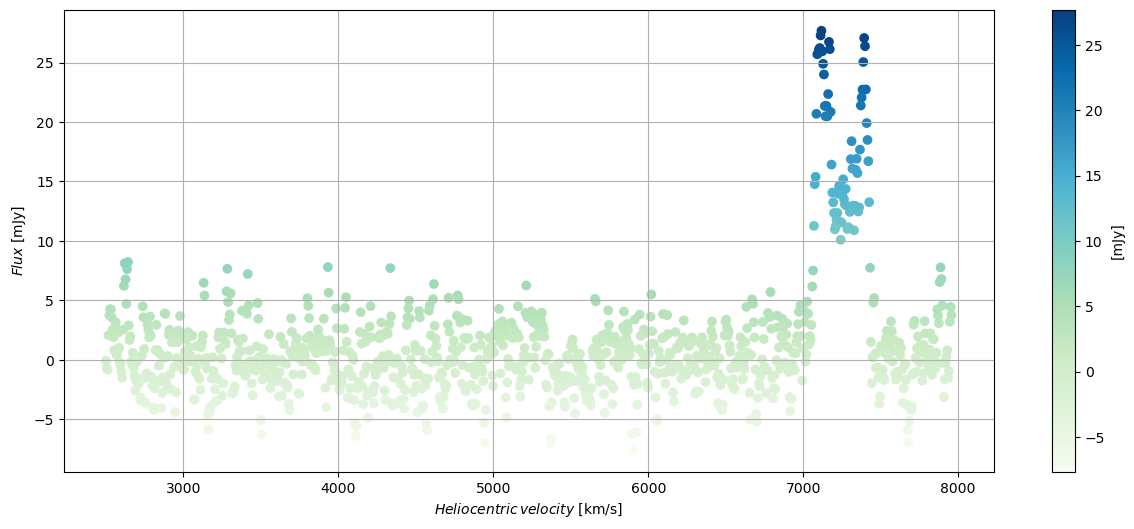

In [115]:
folder_path = "sp"                                       #New location of /sp directory
ns=10

fifth_spectrum_file = sorted([f for f in os.listdir(folder_path) if f.endswith('.fits')])[ns]    #10th Spectrum as Example
file_path = os.path.join(folder_path, fifth_spectrum_file)
data = fits.getdata(file_path)

v_helio = data['VHELIO']                 # Heliocentric Velocity
flux = data['FLUX']                      # Flux

plt.figure(figsize=(15, 6))              #Plot of Spectrum
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.grid(True)
plt.show()


# Step 3: Statistics for an Individual spectrum | PYTHON 3.0
***
**Access link: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/**


1. We generate a preliminary statistic of the curve of a spectrum

In [88]:
mean_flux = np.mean(flux)
rms_flux = np.std(flux)
snr = mean_flux / rms_flux

stats_df = pd.DataFrame({
    'Statistic': ['Media del flujo', 'Desviación estándar del flujo (RMS)', 'SNR en valores de sigma'],
    'Value': [mean_flux, rms_flux, snr]
})

print(stats_df)


                             Statistic     Value
0                      Media del flujo  1.331998
1  Desviación estándar del flujo (RMS)  5.191074
2              SNR en valores de sigma  0.256594


2. An initial Polinomial fitting is made to the spectrum to locate HI lines.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28072\1947854634.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(v_helio, flux, degree)


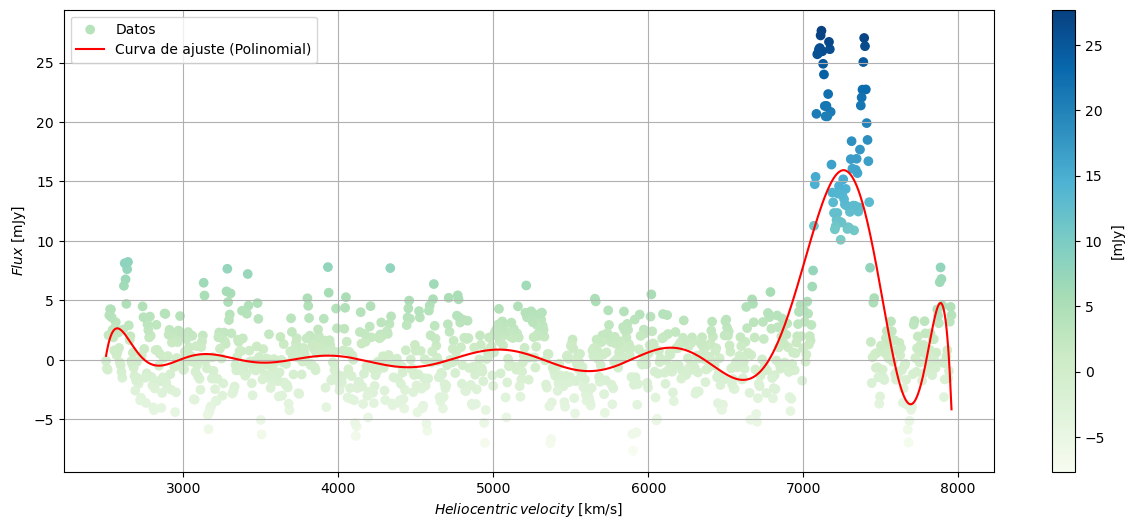

In [116]:
degree = 15  # Degree of Fiting
coefficients = np.polyfit(v_helio, flux, degree)  
polynomial_function = np.poly1d(coefficients)


flux_fit = polynomial_function(v_helio)


plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Datos')
plt.plot(v_helio, flux_fit, color='red', label='Curva de ajuste (Polinomial)')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


2. Filtering the data is necesary, so a binning is applied to the sample:

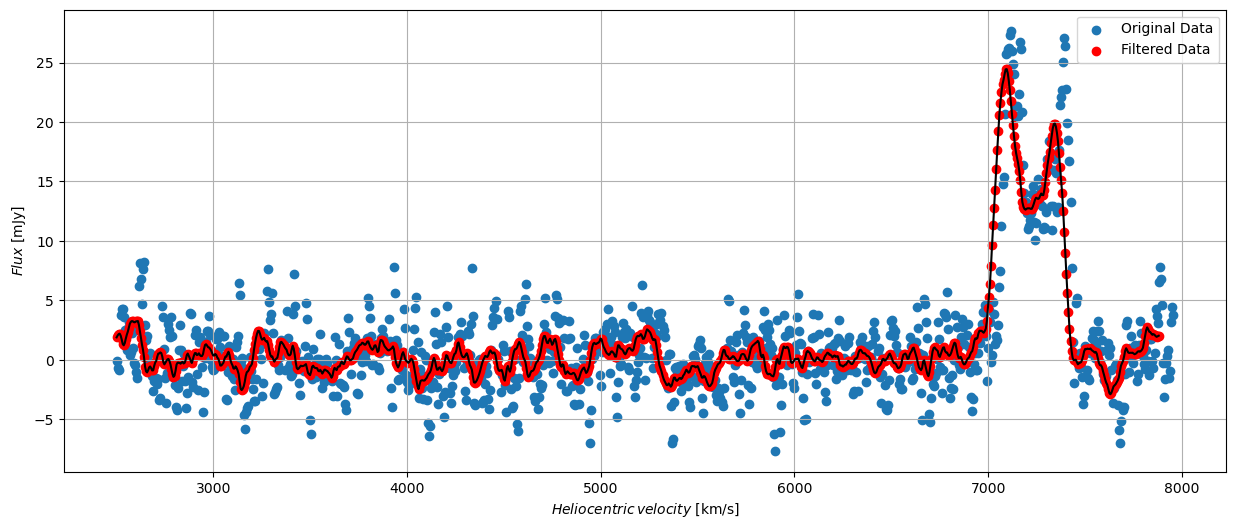

In [117]:
window_size = 15             #Binning window

flux_filtered = np.convolve(flux, np.ones(window_size)/window_size, mode='valid')  #Filtering is applied

plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, label='Original Data')
plt.scatter(v_helio[window_size - 1:], flux_filtered, color='red', label='Filtered Data')
plt.plot(v_helio[window_size - 1:], flux_filtered, color='black')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


3. Statistics for the new curve are generated:

In [118]:
mean_flux_filtered = np.mean(flux_filtered)
rms_flux_filtered = np.std(flux_filtered)
snr_filtered = mean_flux_filtered / rms_flux_filtered

stats_df_filtered = pd.DataFrame({
    'Statistic': ['Mean Flux', 'RMS (Root Mean Square) Flux', 'SNR (Signal-to-Noise Ratio)'],
    'Value': [mean_flux_filtered, rms_flux_filtered, snr_filtered]
})

print(stats_df_filtered)


                     Statistic     Value
0                    Mean Flux  1.329445
1  RMS (Root Mean Square) Flux  4.457744
2  SNR (Signal-to-Noise Ratio)  0.298233


4. Now we will use the filtered data to generate a Lorentz curve fitting.
The curve is also differenciated from an Emision (possitive) or Absorption (negative)

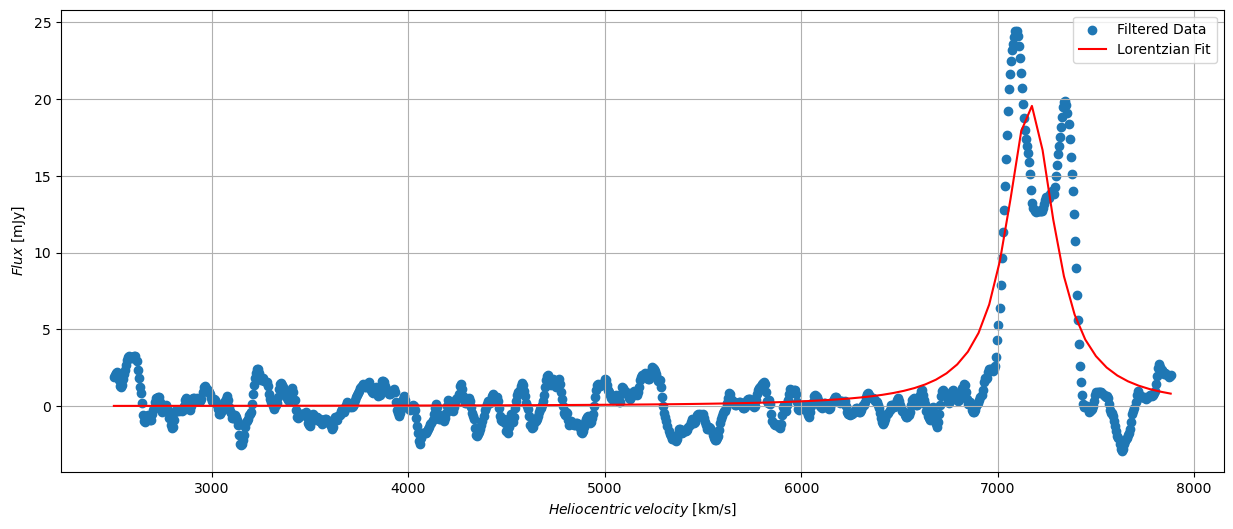

Fitted parameters:

Max peak amplitude (filtered data): 24.457687113457435 mJy
Max peak amplitude (Lorentzian fit): 19.560232909845176 mJy
Center: 7165.880520931621 km/s
Width: 298.5174065643825 km/s
Curve type: Emission



In [106]:
peaks, _ = find_peaks(flux_filtered, prominence=1)   # Main HI line will correspond to a SNR increase
initial_center_guess = v_helio[window_size - 1:][peaks[np.argmax(flux_filtered[peaks])]]  # Initial Guess with Find Peaks
initial_guess = [max(flux_filtered), initial_center_guess, 1]  # Amplitude, Center, Width
bounds = ([0, -np.inf, 0], [np.inf, np.inf, np.inf])  # Bounds for parameters

popt, _ = curve_fit(lorentzian, v_helio[window_size - 1:], flux_filtered, p0=initial_guess, bounds=bounds)  # Perform least squares curve fitting with initial guess and bounds

amplitude_fit, center_fit, width_fit = popt  # Resultant Parameters

def lorentzian(x, amplitude, center, width): # A lorentz ploting curve function is defined
    return amplitude / ((x - center)**2 + (0.5 * width)**2)

x_fit = np.linspace(min(v_helio[window_size - 1:]), max(v_helio[window_size - 1:]), 100)
y_fit = lorentzian(x_fit, amplitude_fit, center_fit, width_fit)

plt.figure(figsize=(15, 6))   #  Plot of Result
plt.scatter(v_helio[window_size - 1:], flux_filtered, label='Filtered Data')
plt.plot(x_fit, y_fit, label='Lorentzian Fit', color='red')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


print("Fitted parameters:\n")   #Print of Results
print("Max peak amplitude (filtered data):", max(flux_filtered[peaks]), "mJy")
print("Max peak amplitude (Lorentzian fit):", max(y_fit), "mJy")
print("Center:", center_fit, "km/s")
print("Width:", width_fit, "km/s")

if amplitude_fit > 0:         # EMISION and ABSORPTION analysis
    curve_type = 'Emission'
else:
    curve_type = 'Absorption'

print("Curve type:", curve_type.capitalize() + "\n")


# Step 3: Statistics from spectrum data base | PYTHON 3.0
***
In Step 3, titled "Statistics from Spectrum Database | PYTHON 3.0", we harness the insights gained from our data processing and analysis. Here, we're focusing on generating histograms based on the statistical analyses performed in the preceding code. This step involves utilizing the fitted parameters obtained from Lorentzian fitting and the Signal-to-Noise Ratio (SNR) calculations to construct informative visualizations. By crafting histograms, we aim to provide a comprehensive overview of the distribution and characteristics of the spectral data, enhancing our understanding of the underlying physical phenomena captured within the dataset. Through these histograms, we can glean valuable insights into the emission or absorption features present in the spectra, further enriching our exploration of the spectral database.


1. An initial inspection from the raw data is generated. Max value of the spectrum (positive or negative) is considered for the emission/absorption discrimination. It should be noted that this is the max value, therefore the selected point could correspond to the "radial  blue-shifted" component of the HI emision by the rotation of the celestial object.

In [157]:
folder_path = "sp"

emission_count = 0
absorption_count = 0

for fits_file in os.listdir(folder_path):  # We iterate for each .fits spectrum
    if fits_file.endswith('.fits'):
        file_path = os.path.join(folder_path, fits_file)
        data = fits.getdata(file_path)
        max_flux = np.max(data['FLUX'])
        
        if max_flux > 0:
            emission_count += 1
        else:
            absorption_count += 1

print("Number of emission spectra:", emission_count)
print("Number of absorption spectra:", absorption_count)


Number of emission spectra: 22138
Number of absorption spectra: 8196


2. Now we will apply same filtering, but for the whole archive.

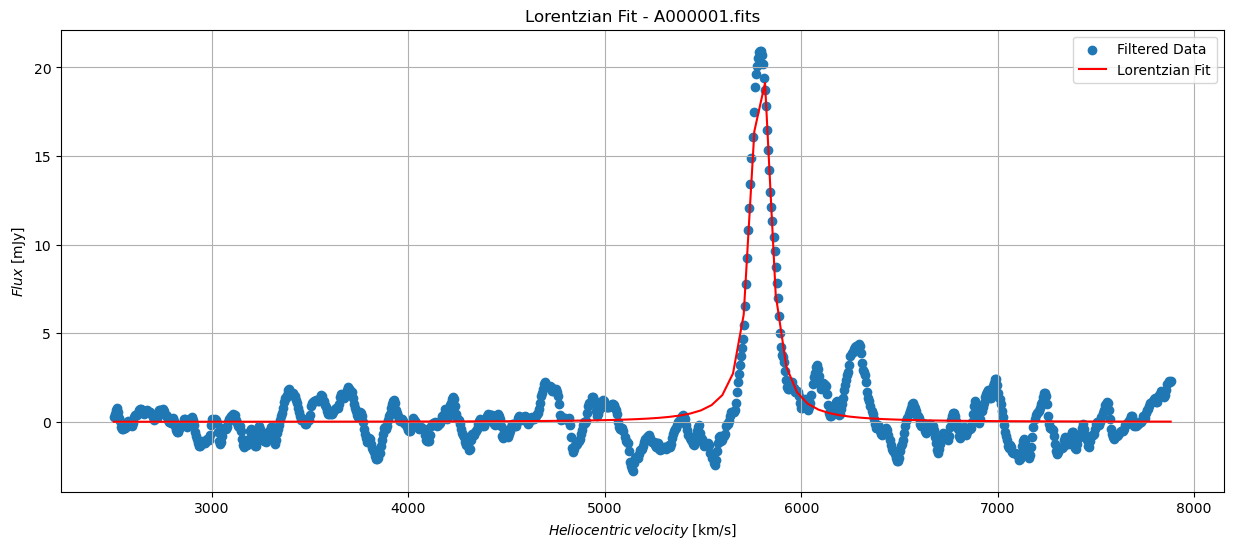

Fitted parameters:
Max peak amplitude (filtered data): 20.940880521957745 mJy
Max peak amplitude (Lorentzian fit): 19.122895642137703 mJy
Center: 5793.2879585572655 km/s
Width: 104.46100036666705 km/s
Curve type: Emission
SNR (Filtered Data): 7.059449358935125
SNR (Lorentzian Fit): 8.364295142635589



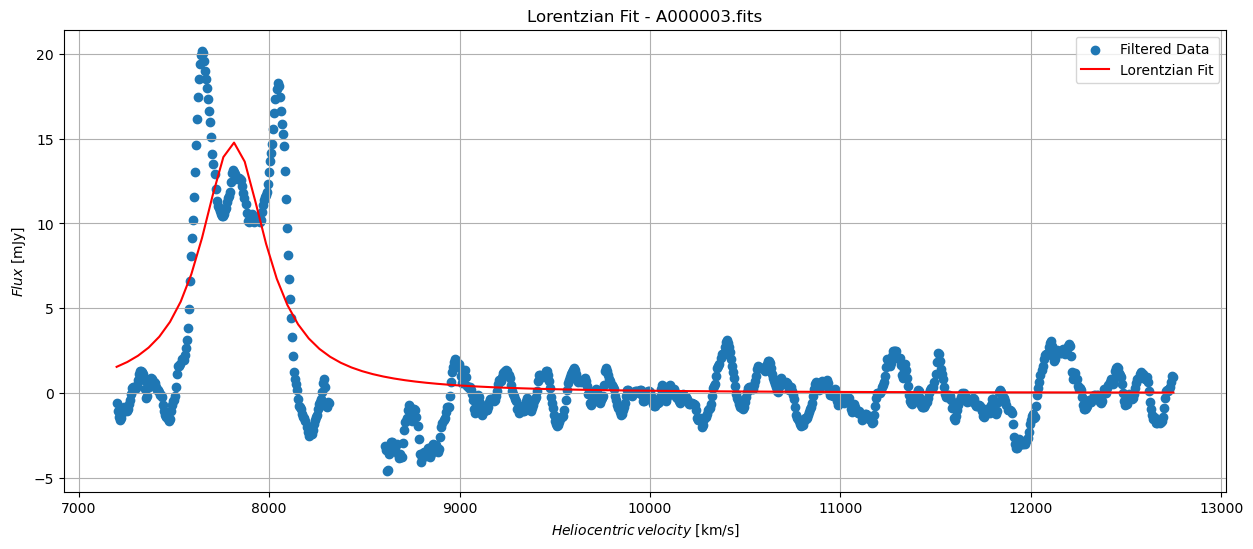

Fitted parameters:
Max peak amplitude (filtered data): 20.184743246534623 mJy
Max peak amplitude (Lorentzian fit): 14.766018105561184 mJy
Center: 7811.066628522141 km/s
Width: 418.35553463061825 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.428116928017355



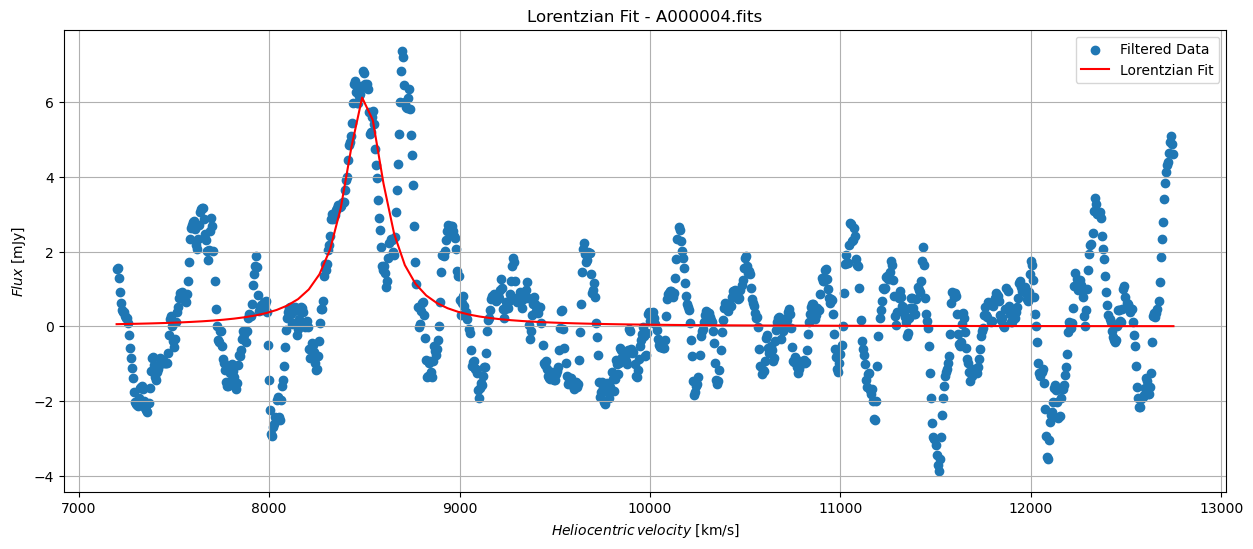

Fitted parameters:
Max peak amplitude (filtered data): 7.371950283113576 mJy
Max peak amplitude (Lorentzian fit): 6.118003421689742 mJy
Center: 8500.003422541777 km/s
Width: 255.06536072355598 km/s
Curve type: Emission
SNR (Filtered Data): 4.041159147313695
SNR (Lorentzian Fit): 5.632730357729962



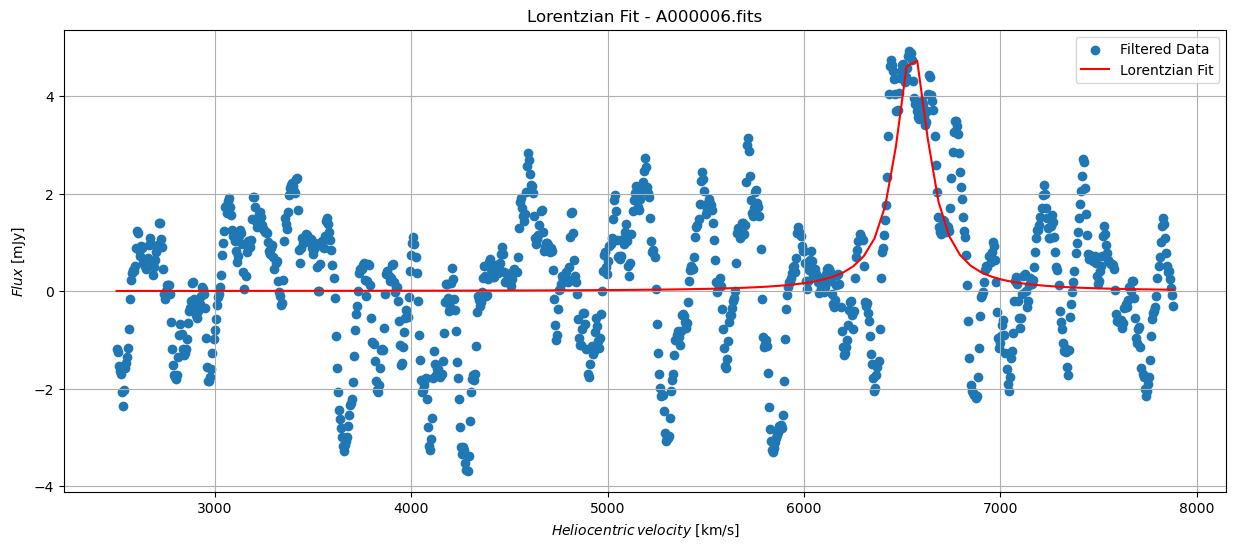

Fitted parameters:
Max peak amplitude (filtered data): 4.926344000220834 mJy
Max peak amplitude (Lorentzian fit): 4.718728189144208 mJy
Center: 6551.674704676206 km/s
Width: 202.33813668225682 km/s
Curve type: Emission
SNR (Filtered Data): 3.169503646523642
SNR (Lorentzian Fit): 6.197654381261933



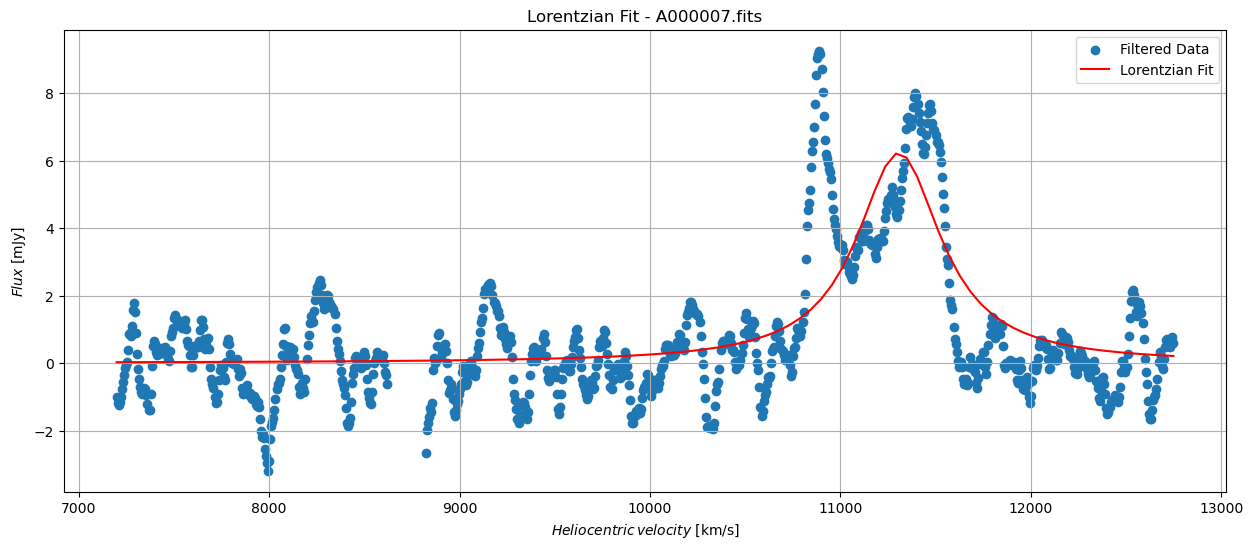

Fitted parameters:
Max peak amplitude (filtered data): 9.255050424965411 mJy
Max peak amplitude (Lorentzian fit): 6.20866139645744 mJy
Center: 11306.471892079482 km/s
Width: 539.9417689065235 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.167205716854877



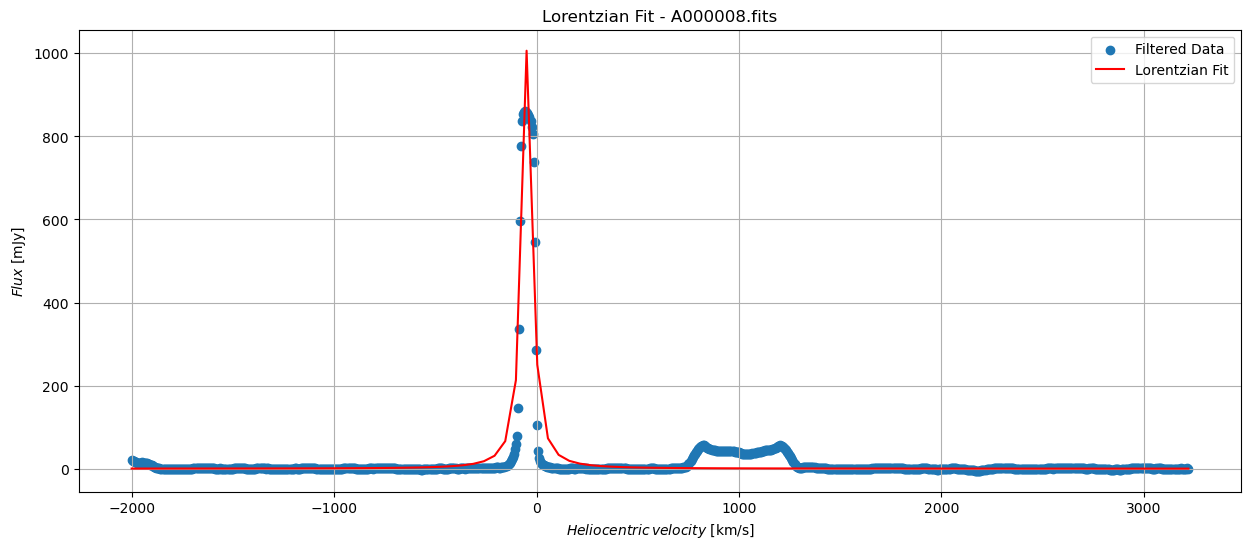

Fitted parameters:
Max peak amplitude (filtered data): 860.9248816666291 mJy
Max peak amplitude (Lorentzian fit): 1006.3885778939776 mJy
Center: -46.549787301353234 km/s
Width: 57.17209224683811 km/s
Curve type: Emission
SNR (Filtered Data): 8.752386280209345
SNR (Lorentzian Fit): 10.928879577237153



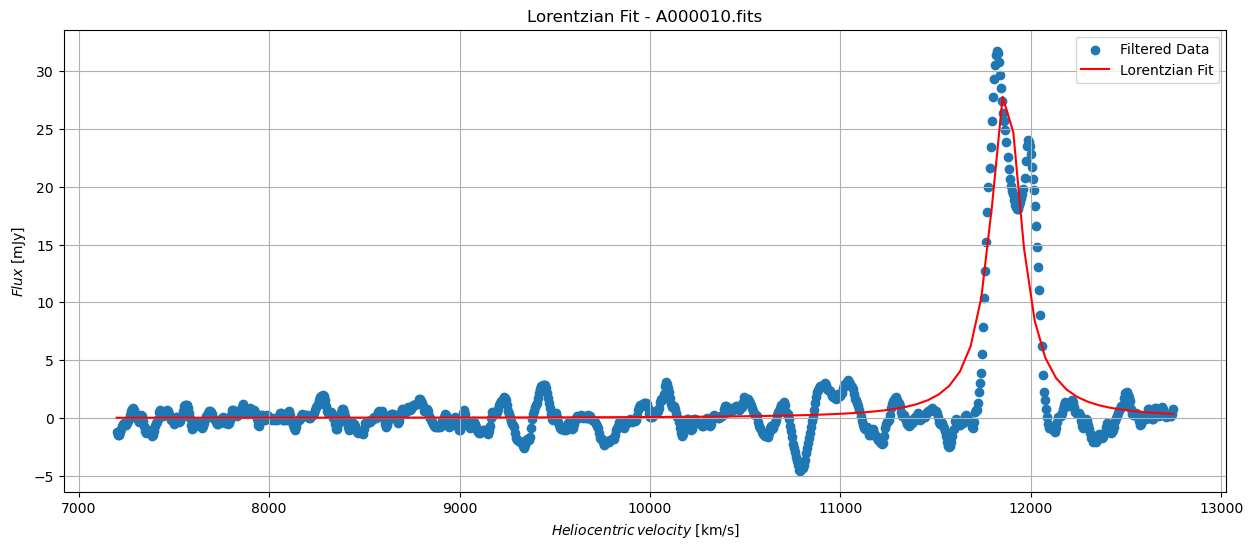

Fitted parameters:
Max peak amplitude (filtered data): 31.762586516537915 mJy
Max peak amplitude (Lorentzian fit): 27.77821414176593 mJy
Center: 11869.014457731082 km/s
Width: 194.93898487972558 km/s
Curve type: Emission
SNR (Filtered Data): 6.186921112773981
SNR (Lorentzian Fit): 6.386128407401997



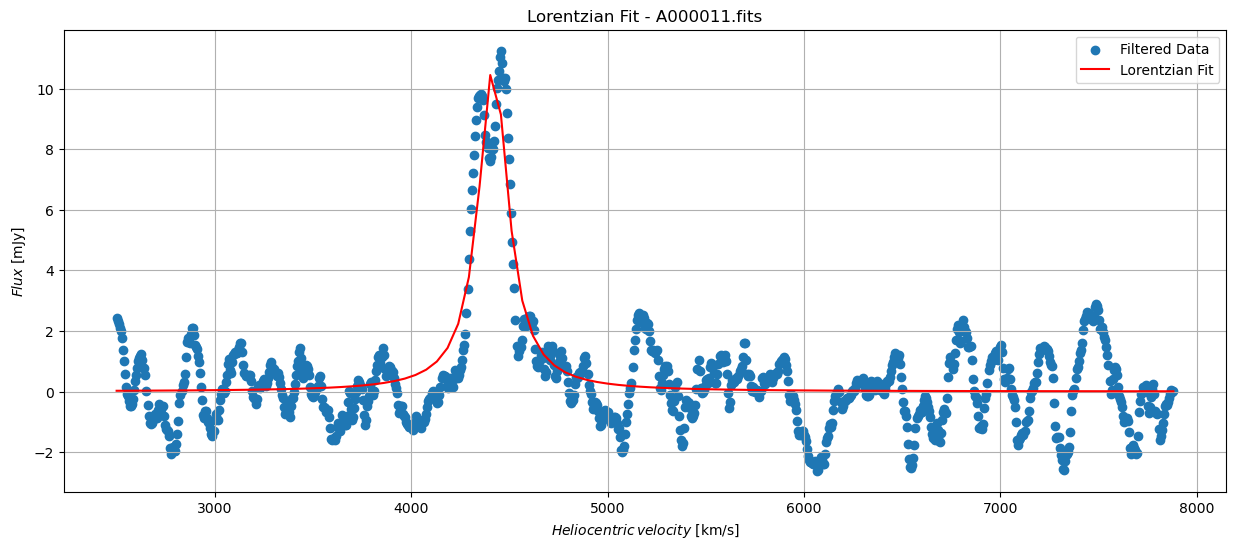

Fitted parameters:
Max peak amplitude (filtered data): 11.252114393158745 mJy
Max peak amplitude (Lorentzian fit): 10.450360001658787 mJy
Center: 4418.328685285718 km/s
Width: 183.13992290663953 km/s
Curve type: Emission
SNR (Filtered Data): 5.434044906765427
SNR (Lorentzian Fit): 6.441404711600341



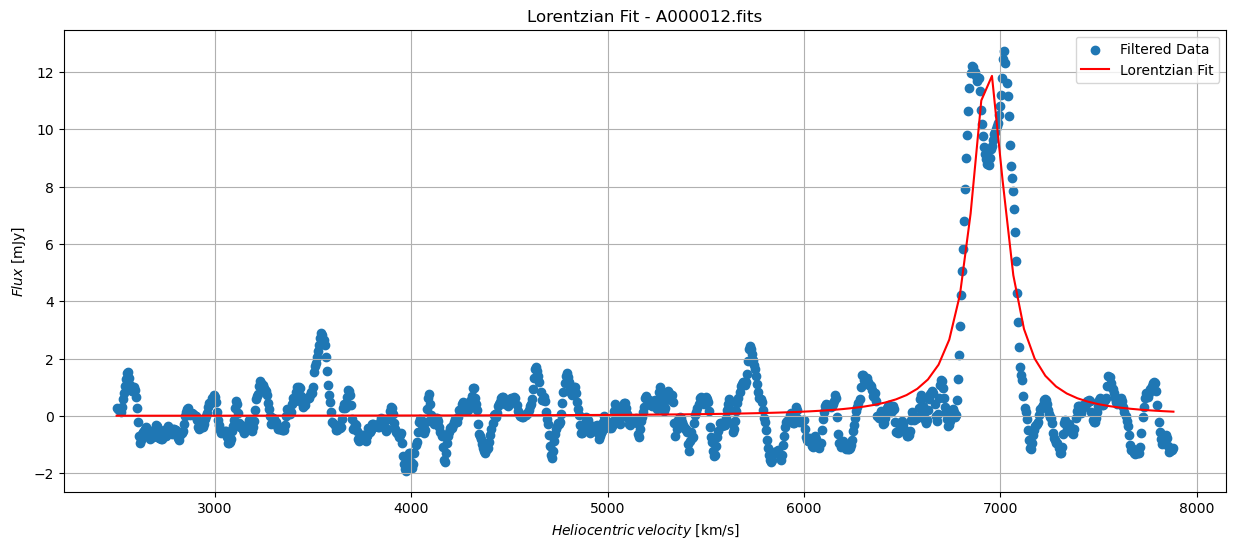

Fitted parameters:
Max peak amplitude (filtered data): 12.7413000781242 mJy
Max peak amplitude (Lorentzian fit): 11.863359981314954 mJy
Center: 6937.753998501551 km/s
Width: 208.8357711057559 km/s
Curve type: Emission
SNR (Filtered Data): 5.389030591185886
SNR (Lorentzian Fit): 6.110434713302928



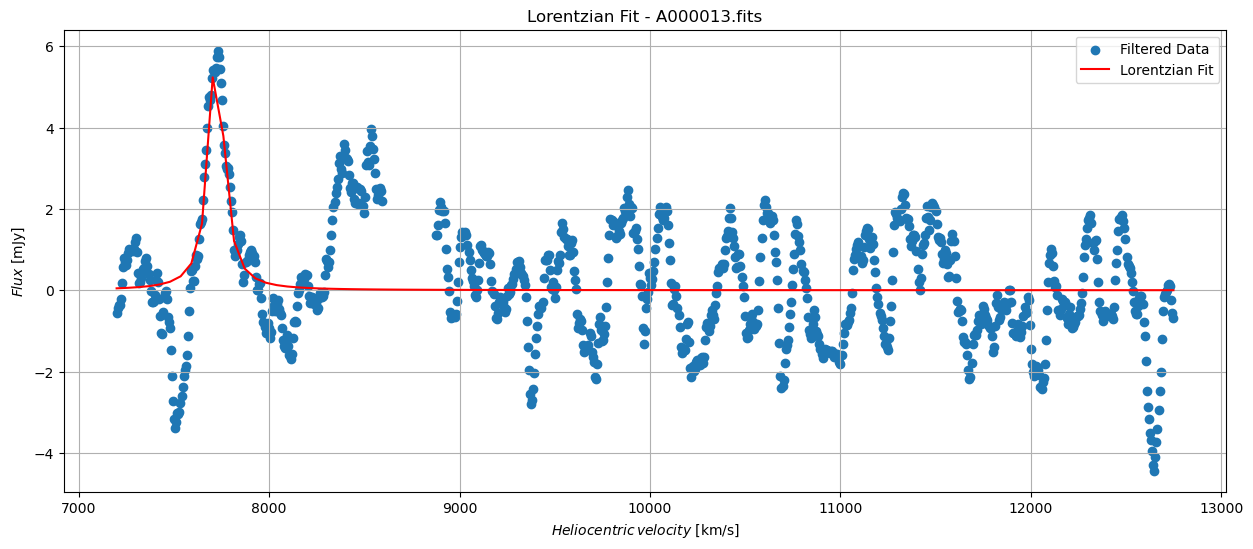

Fitted parameters:
Max peak amplitude (filtered data): 5.888911873316253 mJy
Max peak amplitude (Lorentzian fit): 5.23314950332498 mJy
Center: 7722.778445696898 km/s
Width: 90.57785185636436 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 8.774859576576176



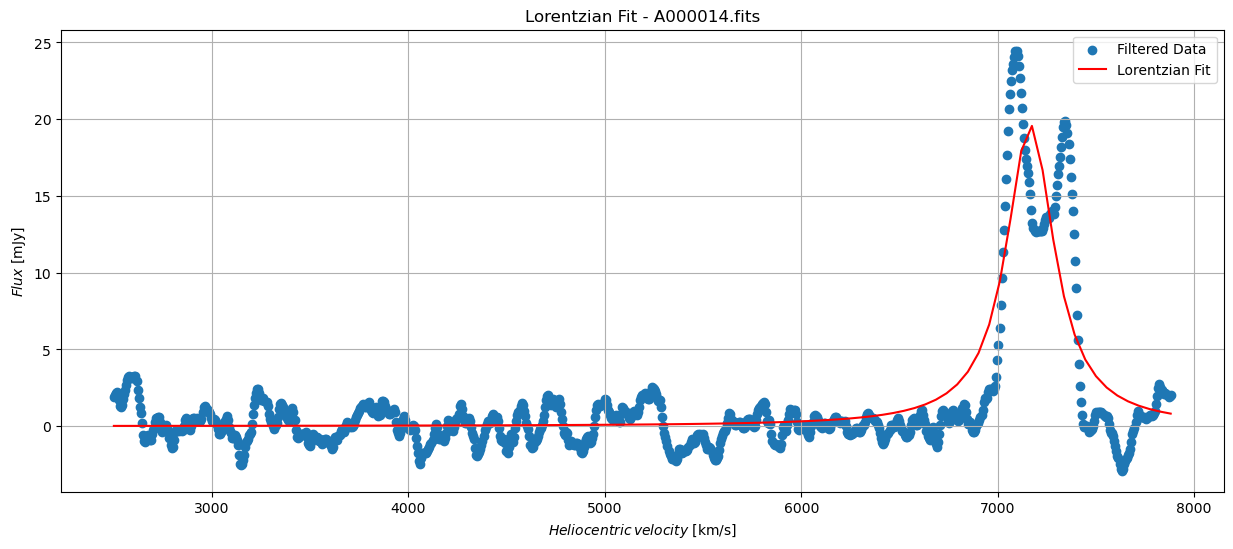

Fitted parameters:
Max peak amplitude (filtered data): 24.457687113457435 mJy
Max peak amplitude (Lorentzian fit): 19.560232909845176 mJy
Center: 7165.880520931621 km/s
Width: 298.5174065643825 km/s
Curve type: Emission
SNR (Filtered Data): 5.486561953175378
SNR (Lorentzian Fit): 5.229106788081845



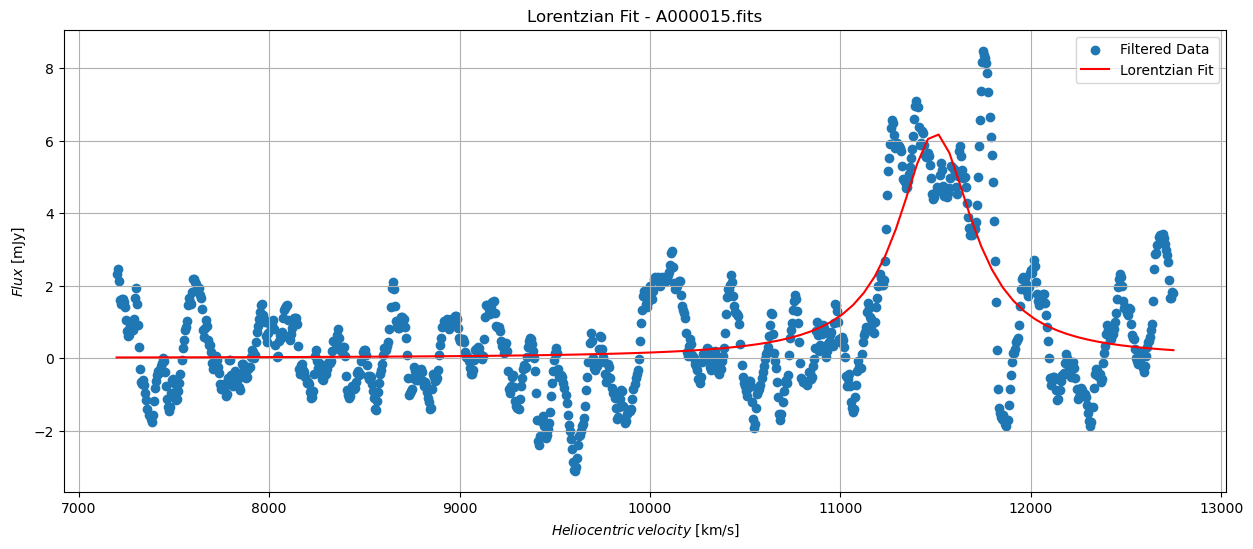

Fitted parameters:
Max peak amplitude (filtered data): 8.481032920043035 mJy
Max peak amplitude (Lorentzian fit): 6.168554613970063 mJy
Center: 11497.97790890331 km/s
Width: 480.25635262498287 km/s
Curve type: Emission
SNR (Filtered Data): 4.326939574125631
SNR (Lorentzian Fit): 4.39622879406928



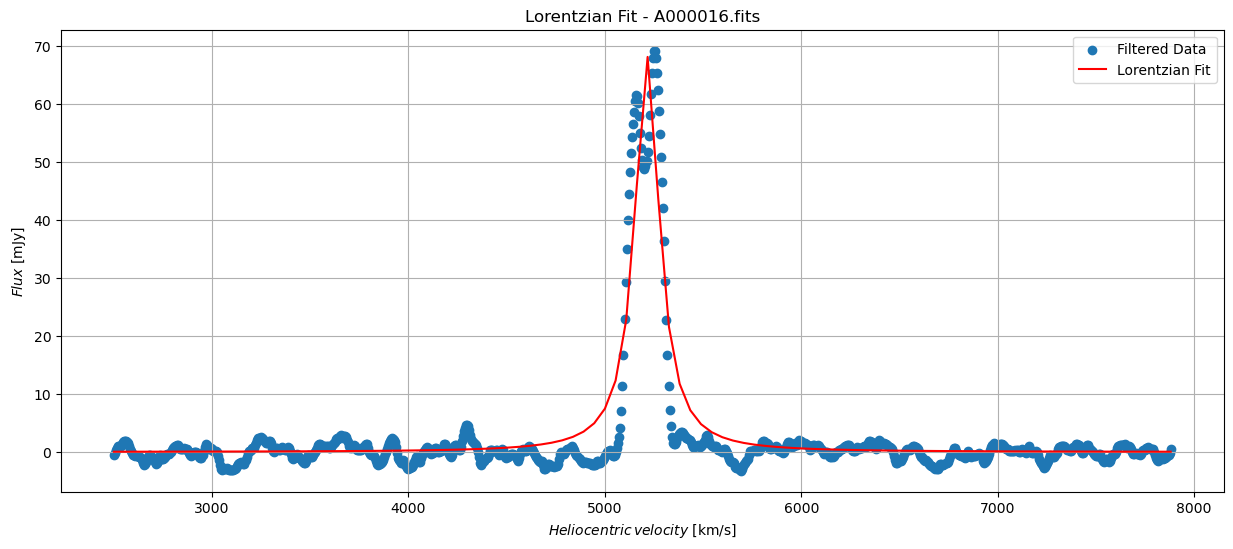

Fitted parameters:
Max peak amplitude (filtered data): 69.2062673717334 mJy
Max peak amplitude (Lorentzian fit): 68.13823422562282 mJy
Center: 5215.406447207228 km/s
Width: 150.99100307755995 km/s
Curve type: Emission
SNR (Filtered Data): 6.493302690834486
SNR (Lorentzian Fit): 7.040521735687864



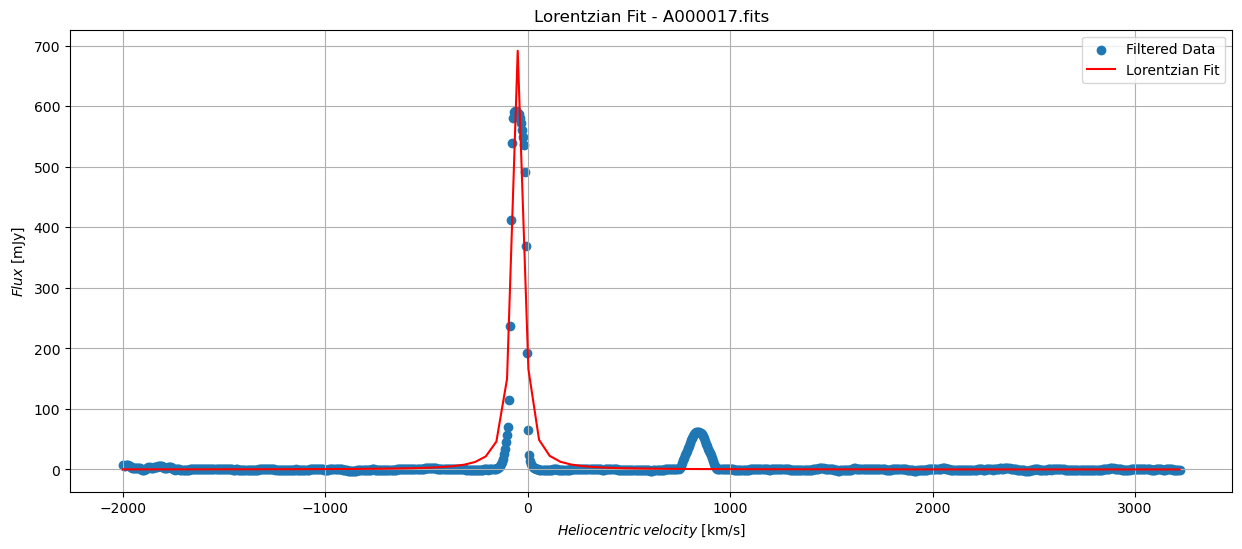

Fitted parameters:
Max peak amplitude (filtered data): 592.935219151225 mJy
Max peak amplitude (Lorentzian fit): 691.9024516941716 mJy
Center: -47.524517790283475 km/s
Width: 57.093457197281836 km/s
Curve type: Emission
SNR (Filtered Data): 8.818300913994266
SNR (Lorentzian Fit): 10.889186493724218



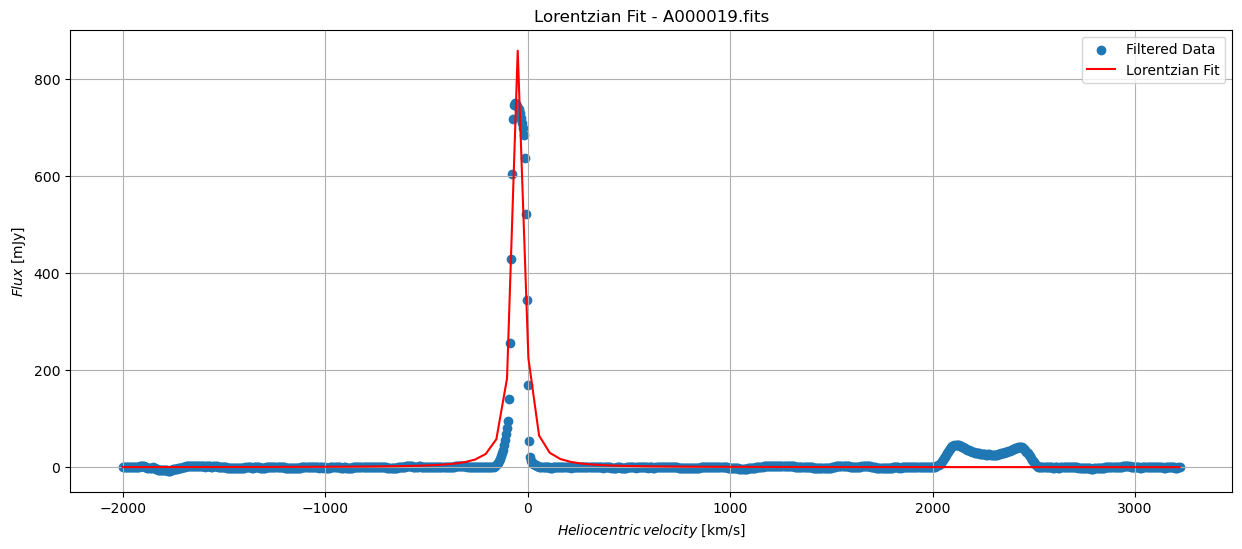

Fitted parameters:
Max peak amplitude (filtered data): 750.8968217258349 mJy
Max peak amplitude (Lorentzian fit): 858.71623951033 mJy
Center: -45.75639328088307 km/s
Width: 58.01772766095121 km/s
Curve type: Emission
SNR (Filtered Data): 8.892052156765537
SNR (Lorentzian Fit): 10.871205658163307



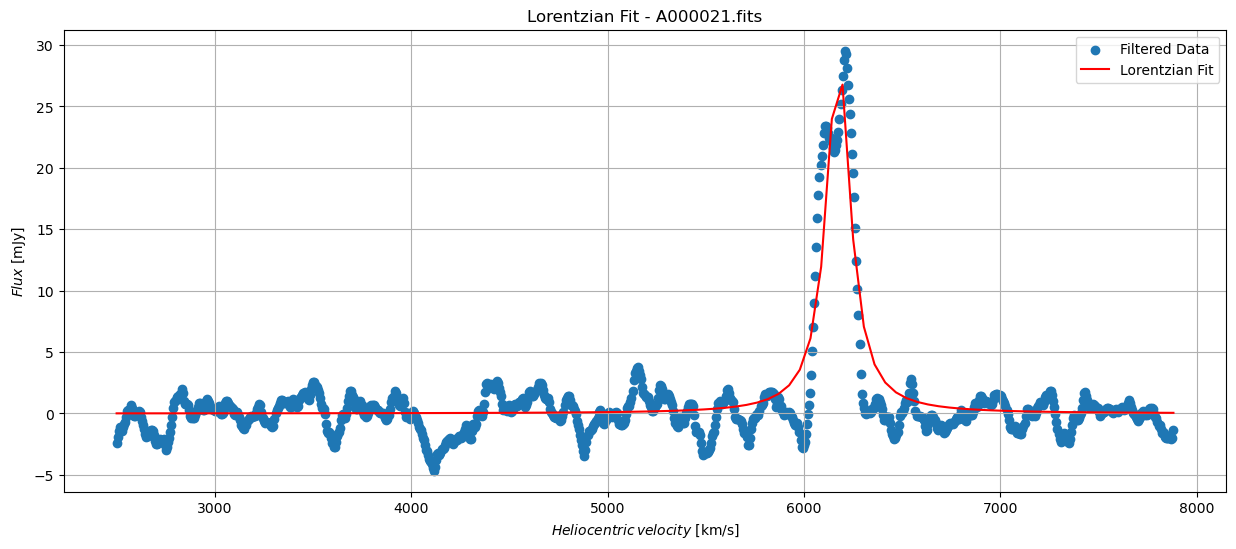

Fitted parameters:
Max peak amplitude (filtered data): 29.53932280457195 mJy
Max peak amplitude (Lorentzian fit): 26.780999970133195 mJy
Center: 6175.1009180563415 km/s
Width: 147.31404963046933 km/s
Curve type: Emission
SNR (Filtered Data): 6.406025294802234
SNR (Lorentzian Fit): 7.144196936594285



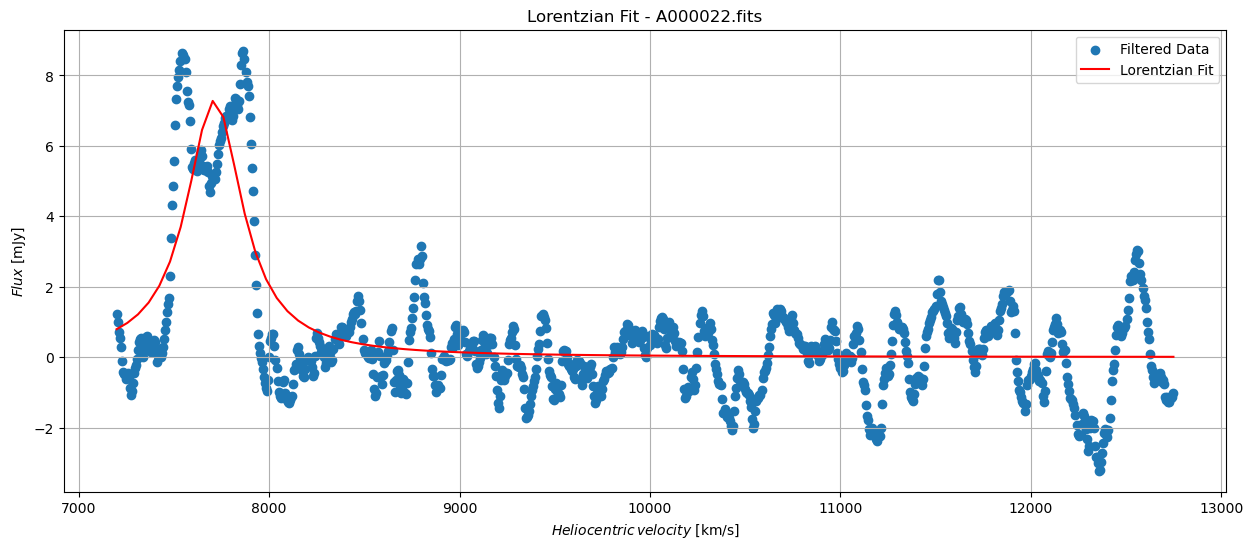

Fitted parameters:
Max peak amplitude (filtered data): 8.701709313384725 mJy
Max peak amplitude (Lorentzian fit): 7.276284577572446 mJy
Center: 7711.748907580536 km/s
Width: 358.5689399149048 km/s
Curve type: Emission
SNR (Filtered Data): 4.277576643786954
SNR (Lorentzian Fit): 4.833018027403503



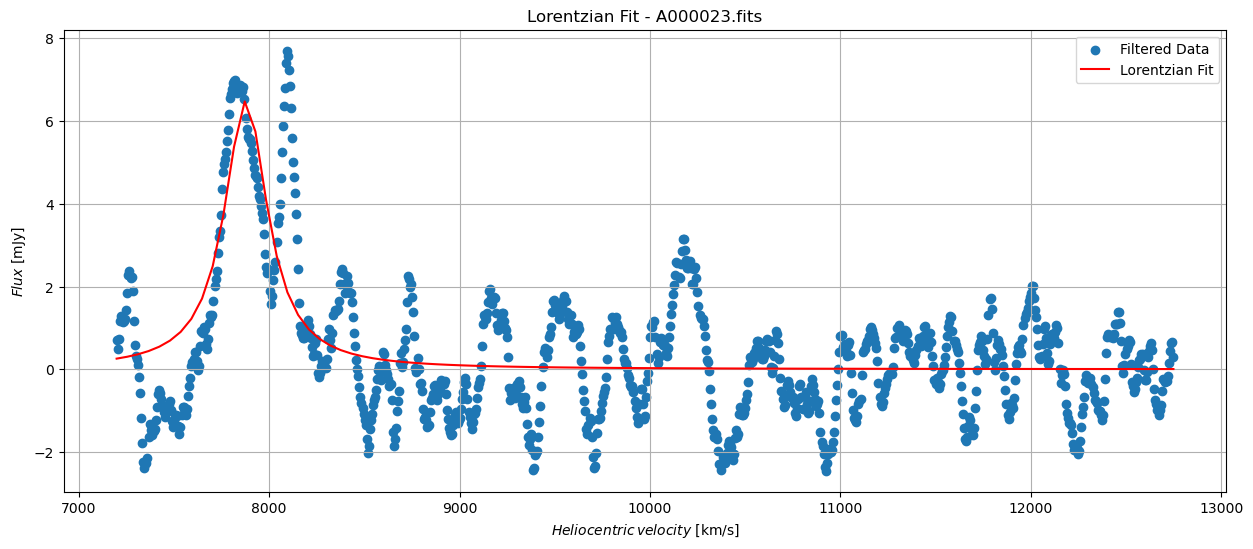

In [ ]:
folder_path = "sp"
window_size = 15  # Define window size for filtering

def lorentzian(x, amplitude, center, width):   # A lorentz ploting curve function is defined
    return amplitude / ((x - center)**2 + (0.5 * width)**2)

fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fits')] # List for all FITS files is createdin the folder

for fits_file in fits_files:
    file_path = os.path.join(folder_path, fits_file)
    data = fits.getdata(file_path)   # Read data for each file
    flux = data['FLUX']
    v_helio = data['VHELIO']
    flux_filtered = np.convolve(flux, np.ones(window_size) / window_size, mode='valid')  #Filtering is applied
    v_helio_filtered = v_helio[window_size - 1:]
    
    peaks, _ = find_peaks(flux_filtered, prominence=1)  # Peaks are found

    snr_filtered = max(flux_filtered[peaks]) / np.std(flux_filtered)  # SNR is calculated for the filtered data
    
    initial_center_guess = v_helio_filtered[peaks[np.argmax(flux_filtered[peaks])]] #Initial guess
    initial_guess = [max(flux_filtered), initial_center_guess, 1]
    bounds = ([0, -np.inf, 0], [np.inf, np.inf, np.inf])
    
    try:
        valid_indices = np.isfinite(flux_filtered)     # Depuration of infinite and NaN values from flux data
        flux_filtered_valid = flux_filtered[valid_indices]
        v_helio_filtered_valid = v_helio_filtered[valid_indices]
        
        popt, _ = curve_fit(lorentzian, v_helio_filtered_valid, flux_filtered_valid, p0=initial_guess, bounds=bounds) # Perform Lorentzian fitting with valid data
        
        y_fit = lorentzian(v_helio_filtered_valid, *popt)
        snr_fit = max(y_fit) / np.std(y_fit)   # SNR is calculated for the Lorentzian fitting
    except RuntimeError:
        print(f"Fit failed for {fits_file}. Skipping...")
        continue
    
    amplitude_fit, center_fit, width_fit = popt
    
    x_fit = np.linspace(min(v_helio_filtered_valid), max(v_helio_filtered_valid), 100)   # Plot of the results
    y_fit = lorentzian(x_fit, amplitude_fit, center_fit, width_fit)
    plt.figure(figsize=(15, 6))
    plt.scatter(v_helio_filtered_valid, flux_filtered_valid, label='Filtered Data')
    plt.plot(x_fit, y_fit, label='Lorentzian Fit', color='red')
    plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
    plt.ylabel(r'$\mathit{Flux}$ [mJy]')
    plt.legend()
    plt.grid(True)
    plt.title(f'Lorentzian Fit - {fits_file}')
    plt.show()
    
    print("Fitted parameters:")    # Print of the results
    print("Max peak amplitude (filtered data):", max(flux_filtered[peaks]), "mJy")
    print("Max peak amplitude (Lorentzian fit):", max(y_fit), "mJy")
    print("Center:", center_fit, "km/s")
    print("Width:", width_fit, "km/s")
    curve_type = 'Emission' if amplitude_fit > 0 else 'Absorption'
    print("Curve type:", curve_type.capitalize())
    print("SNR (Filtered Data):", snr_filtered)
    print("SNR (Lorentzian Fit):", snr_fit)
    print()



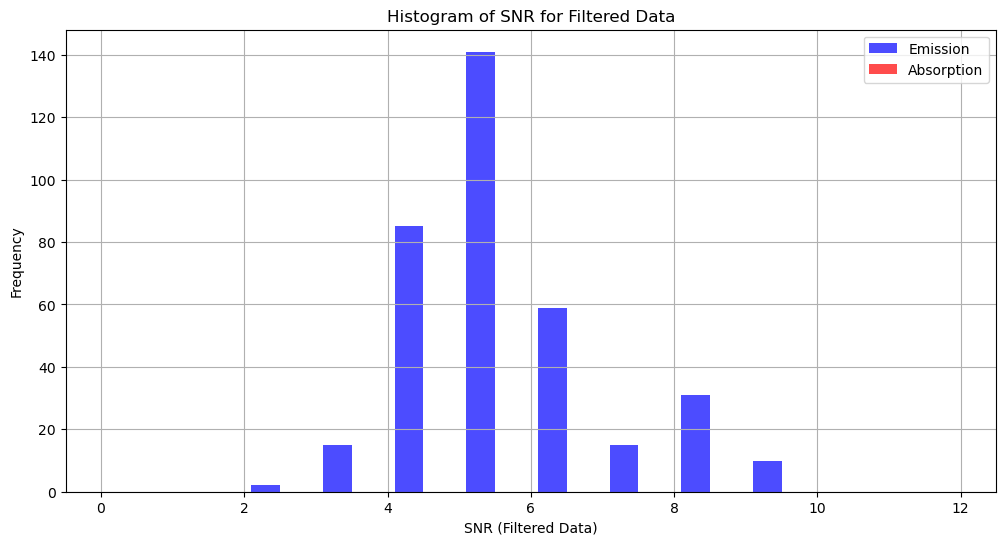

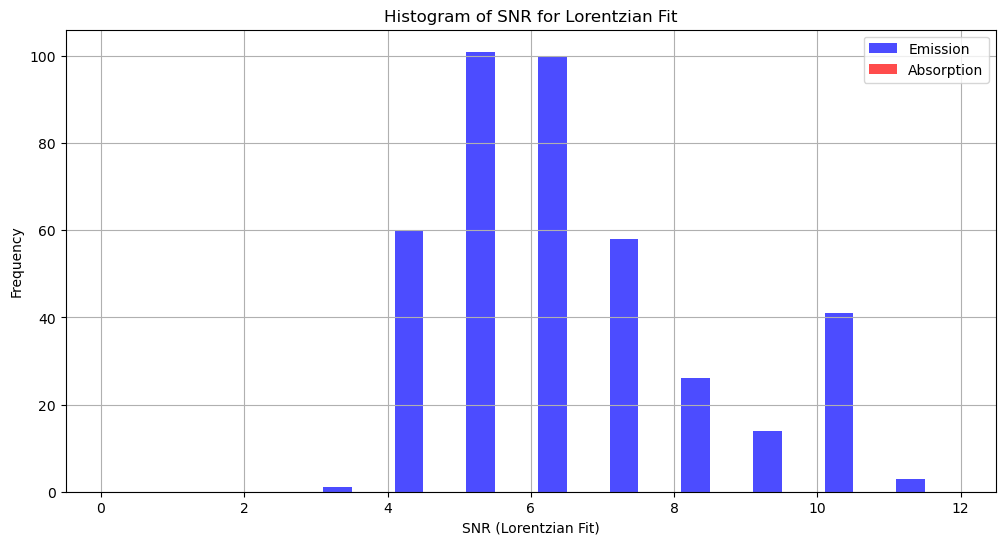

In [161]:
if snr_filtered_emission:
    max_snr_filtered_emission = max(snr_filtered_emission)
else:
    max_snr_filtered_emission = 0

if snr_filtered_absorption:
    max_snr_filtered_absorption = max(snr_filtered_absorption)
else:
    max_snr_filtered_absorption = 0

if snr_fit_emission:
    max_snr_fit_emission = max(snr_fit_emission)
else:
    max_snr_fit_emission = 0

if snr_fit_absorption:
    max_snr_fit_absorption = max(snr_fit_absorption)
else:
    max_snr_fit_absorption = 0
    
#-----------------------------


snr_ranges = np.arange(0, max(max_snr_filtered_emission, max_snr_filtered_absorption, max_snr_fit_emission, max_snr_fit_absorption) + 1) # Ranges of histograms

plt.figure(figsize=(12, 6))     # Plot of the results
plt.hist([snr_filtered_emission, snr_filtered_absorption], bins=snr_ranges, color=['blue', 'red'], alpha=0.7, label=['Emission', 'Absorption'])
plt.xlabel('SNR (Filtered Data)')
plt.ylabel('Frequency')
plt.title('Histogram of SNR for Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))   # Print of the results
plt.hist([snr_fit_emission, snr_fit_absorption], bins=snr_ranges, color=['blue', 'red'], alpha=0.7, label=['Emission', 'Absorption'])
plt.xlabel('SNR (Lorentzian Fit)')
plt.ylabel('Frequency')
plt.title('Histogram of SNR for Lorentzian Fit')
plt.legend()
plt.grid(True)
plt.show()
